# KNN Proje

Bu projede Scikit-Learn kullanarak gerçe bir veri seti üzerinde KNN kullanarak tahminleme yapacağız.

#### 1 - Veri Setini Yükleme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

**Iris Dataset:**

https://archive.ics.uci.edu/ml/datasets/iris

İris adlı bir çiçek türüne ait 150 adet veriden oluşur.

Veri yapısı aşağıdaki gibidir:
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)
5. class: 
  * Iris Setosa
  * Iris Versicolour
  * Iris Virginica

Her bir sınıftan 50 şer veri vardır.

<img src='images/iris.png' />

In [2]:
dataset = pd.read_csv('data/iris.csv')

In [3]:
# veri içindeki adet (n -> satır sayısı) ve feature (p -> değişken sayısı)
# shape -> (n, p)
# n = 150
# p = 4

dataset.shape

(150, 6)

In [4]:
# ilk 5 satırı görelim

dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# basit istatistikler

dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Her sınıftan (class) kaç adet var

dataset.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

#### 2- Features (Değişkenler) ve Labels (Sınıflar) olarak ayırma

In [7]:
# Değişken sütunları

feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']

In [8]:
# Feature Matrisi

X = dataset[feature_columns].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
# Labels vektörü

y = dataset['Species'].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#### 3- Label Encoding

Label sütunu (y) kategorik olduğu için bu sütunu encoding yapmak zorundayız.

Label Encode sonrası yeni değerler şöyle olacak:
* Iris Setosa: 0
* Iris Versicolour: 1
* Iris Virginica: 2

In [10]:
# Scikit-Learn den bir LabelEncoder alalım

from sklearn.preprocessing import LabelEncoder

In [11]:
# LabelEncoder nesnemizi yaratalım

le = LabelEncoder()

In [12]:
# encode etmeden önce y'yi görelim

print('Iris-setosa:\n', y[0:10])
print('\n')
print('Iris-versicolour:\n', y[50:60])
print('\n')
print('Iris-virginica:\n', y[100:110])

Iris-setosa:
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Iris-versicolour:
 ['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor']


Iris-virginica:
 ['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


In [13]:
# şimdi y'yi encode edelim

y = le.fit_transform(y)

In [14]:
# encode ettikten sonra y'yi görelim

print('Iris-setosa:\n', y[0:10])
print('\n')
print('Iris-versicolour:\n', y[50:60])
print('\n')
print('Iris-virginica:\n', y[100:110])

Iris-setosa:
 [0 0 0 0 0 0 0 0 0 0]


Iris-versicolour:
 [1 1 1 1 1 1 1 1 1 1]


Iris-virginica:
 [2 2 2 2 2 2 2 2 2 2]


#### 4- Train-Test Split

Test verisini train yani öğrenme verisinden tamamen ayırmak için Train-Test split yapmamız lazım.

In [15]:
# train_test_split metodunu import edelim

from sklearn.model_selection import train_test_split

In [16]:
# şimdi veriyi ayıralım
# Train - Test  --->  %60 - %40

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state = 4)

In [17]:
# Train data şekli

print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

X_train: (90, 4)
y_train: (90,)


In [18]:
# Test data şekli

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_test: (60, 4)
y_test: (60,)


#### 5- Scaling

**ÖNEMLİ:**

Normalde data üzerinde bir işlem yapmadan önce `scaling` yaparız. Yani değişkenleri aynı büyüklük skalasına getiririz. (Genelde 0-1 arasına)

Ama bu data set içinde tüm değişkenler `cm` cinsinden ve aynı skalada olduğu için bir scaling yapmamıza gerek yok.

#### 6- Veriyi Görselleştirme

**Pair-Plot:**

Veride değişken sayısı 2 den fazla olduğu için koordinat ekseni kullanamayız görselleştirme için.

O yüzden pair-plot kullanacağız:

<Figure size 432x288 with 0 Axes>

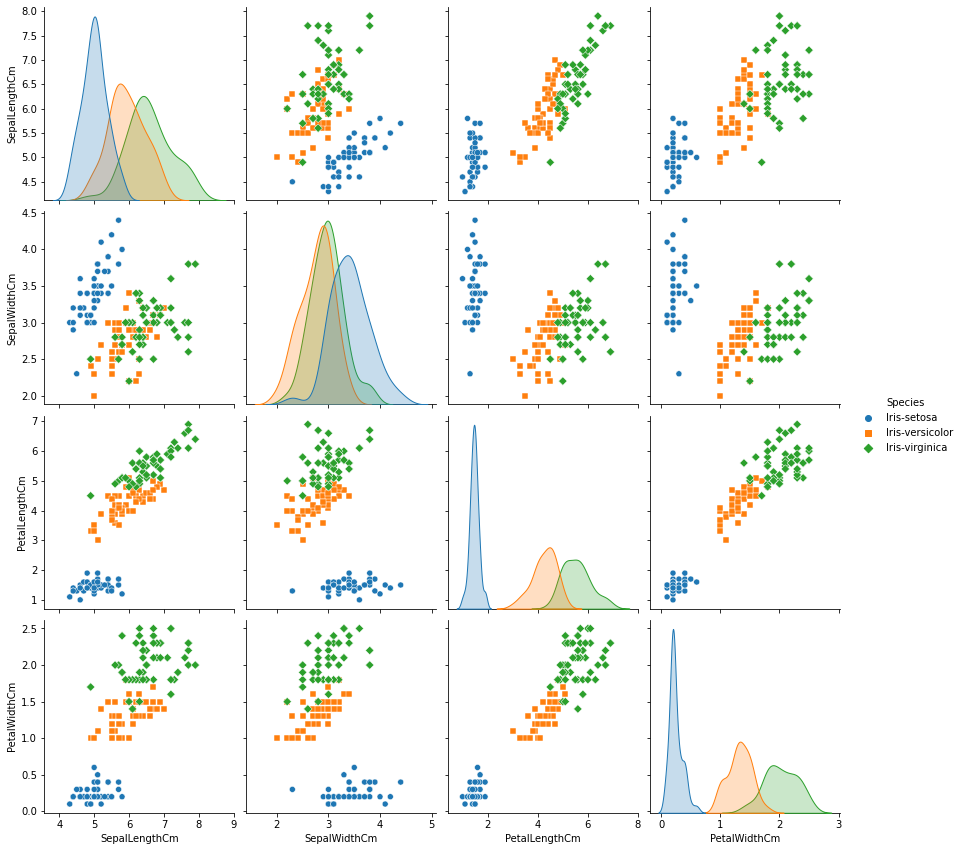

In [19]:
plt.figure()
sns.pairplot(dataset.drop("Id", axis=1), 
             hue="Species", 
             size=3, 
             markers=["o", "s", "D"])
plt.show()

**Box-Plot:**

<Figure size 432x288 with 0 Axes>

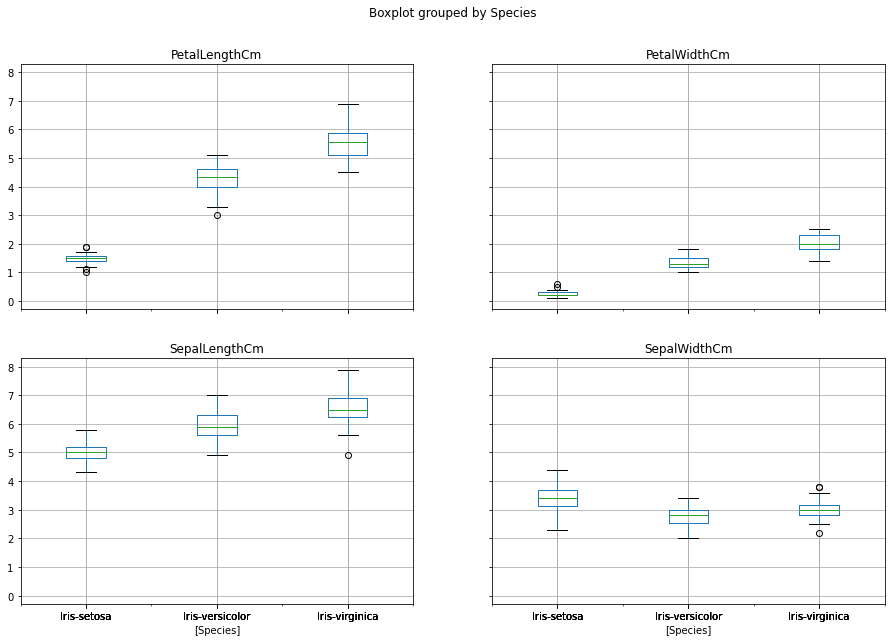

In [20]:
plt.figure()
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(15, 10))
plt.show()

#### 7- Model Geliştirme

In [21]:
# gerekli kütüphaneyi import edelim

from sklearn.neighbors import KNeighborsClassifier

In [22]:

def sklearn_knn(train_data, label_data, test_data, k):
    """Scikit-Learn ile KNN uygulama fonksiyonu"""
    
    # knn classifier yarat
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train -> X_train
    knn.fit(train_data, label_data)
    
    # Predict -> X_test
    predict_label = knn.predict(test_data)
    
    # Return
    return predict_label


**Tahmin:**

Şimdi elimizde tahmin yapmak için gereken herşey var. 

Yapmamız gereken tek şey `K` değerine karar vermek `sklearn_knn` fonksiyonunu çağırmak.

In [23]:
# sklearn_knn fonksiyonunu çağır ve tahmin değerlerini al

# K = 3

y_predict = sklearn_knn(X_train, y_train, X_test, 3)
y_predict

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1])

In [24]:
y_predict.shape

(60,)

#### 8- Model Doğruluğunu Ölçme

**Doğruluk:**

Gerçek y değerleri (gerçek sınıflar) ile tahmin değerlerini karşılaştırma ile bulunur.

In [25]:

def accuracy(test_labels, pred_labels):  
    """Doğruluk hesaplama fonksiyonu"""
    
    # Doğru tahminlerin sayısını hesapla
    correct = np.sum(test_labels == pred_labels) 
    
    # Toplam test data adedi
    n = len(test_labels) 
    
    # accuracy -> doğruluk oranı = doğru tahmin / toplam test verisi
    accur = correct / n
    
    return accur


In [26]:
# şimdi accuracy fonksiyonunu kullanıp model doğruluğumuzu ölçelim

accuracy(y_test, y_predict)

0.9666666666666667

İnanılmaz değil mi?

Iris dataset üzerinde `K=3` için elde ettiğimiz doğruluk oranı `%96.67`.

Şimdi doğruluk oranını (accuracy) standart scikit-learn fonksiyonu ile alalım:

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_sklearn = accuracy_score(y_test, y_predict)*100

In [29]:
print('Model Doğruluğumuz (Accuracy) ' + str(round(accuracy_sklearn, 2)) + ' %.')

Model Doğruluğumuz (Accuracy) 96.67 %.


Gördüğünüz gibi elle hesapladığımız Accuracy ile Scikit-Learn'ün bize verdiği değer birebir aynı.

#### 9- K Değerini Seçmek

`K` değerini 3 olarak aldığımızda çok iyi bir doğruluk oranı elde ettik.

Ama gerçek hayatta her zaman bu kadar şanslı olamayız.

O yüzden `K` değerinin belirlemek için `Train-Test Data` üzerinde farklı `K` değerleri deneyip en uygun olana karar vermemiz lazım.

**Genel Geçer Kabul:**

Tecrübelere göre K değeri eldeki veri adedinin (n) karekökünden büyük olmamalı.

ML dünyasında bu şekilde bir genel geçer kabul hakimdir.

In [30]:
n = len(dataset)
n

150

In [31]:
import math
k_max = math.sqrt(n)
k_max

12.24744871391589

Buna göre K değeri maksimum 12 olmalıdır. 

Yani 1 ile 12 arasındaki değerleri tek tek kontrol edeceğiz.

En iyi Accuracy'yi vereni alacağız.

In [35]:
# Accuracy oranları için bir liste yarat
normal_accuracy = []  

# olabilecek K değerleri
k_value = range(1, 13)

# döngü ile tek tek K değerlerine bak
for k in k_value:
    y_predict = sklearn_knn(X_train, y_train, X_test, k)
    accur = accuracy_score(y_test, y_predict)
    normal_accuracy.append(accur)


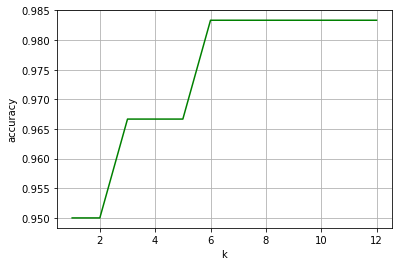

In [38]:
# Şimdi bu K değerlerine göre elde ettiğimiz Accuracy'leri çizelim

plt.xlabel("k")
plt.ylabel("accuracy")

# grafiği çiz
plt.plot(k_value, normal_accuracy, c='g')

# Izgara ekle
plt.grid(True)  

plt.show()

Burada gördüğünüz gibi k değeri arttıkça belli bir artış elde ettik.

`K=6` dan sonra gerisi aynı accuracy ile kaldı.

O yüzden en iyi K değeri, bu veri seti için, 6 diyebiliriz.

**Soru:**

Neden `K=6` aldık da, K=12 almadık?

**Cevap:**

Çünkü her ikisi de aynı doğruluk oranını verse de K=6 daha az kompleks bir model. 

Yani daha sade.

ML'de sadelik iyidir, çünkü daha iyi genellenebilir.

(Hatırlayınız: Tahmin Doğruluğu mu, Model Sadeliği mi?)

**Doğrulama:**

Peki K'yi 12 ile sınırlamasaydık ne olurdu?

Bu sefer 1-30 arasındaki K değerleri üzerinde arayalım:

In [39]:
# Accuracy oranları için bir liste yarat
normal_accuracy = []  

# olabilecek K değerleri
k_value = range(1, 31)

# döngü ile tek tek K değerlerine bak
for k in k_value:
    y_predict = sklearn_knn(X_train, y_train, X_test, k)
    accur = accuracy_score(y_test, y_predict)
    normal_accuracy.append(accur)

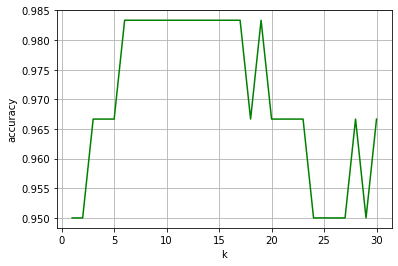

In [40]:
# Şimdi bu K değerlerine göre elde ettiğimiz Accuracy'leri çizelim

plt.xlabel("k")
plt.ylabel("accuracy")

# grafiği çiz
plt.plot(k_value, normal_accuracy, c='g')

# Izgara ekle
plt.grid(True)  

plt.show()

Gördüğünüz gibi zaten K=12 den sonra bir iyileşme elde edemedik.

Hatta düştü Accuracy oranı.